<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/Mice%2BMissForest%20TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable.xlsx')
df = df.iloc[:, 1:]
df

,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,...,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),L1:eGFR,L14:WBC,LabLocation,LabCwhen
0,924852,2.63,15.80,2560-08-07 12:32:50.527,4376081,18.847273,0,90,0,90,...,NaN,NaN,NaN,NaN,NaN,NaN,15.80,6.67,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-08-07 12:15:51.760
1,989278,2.03,32.30,2560-08-11 08:22:48.737,4390501,4.319167,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,32.30,9.65,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-08-11 10:22:04.653
2,2103792,1.05,55.90,2560-08-14 14:38:44.150,4394805,0.882418,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,55.90,7.48,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-08-14 15:03:54.277
3,953611,1.03,51.10,2560-08-15 02:05:01.323,4395019,6.312446,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,51.10,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-08-15 02:05:01.583
4,488150,1.94,32.60,2560-08-15 09:18:43.240,4396053,2.848364,0,0,0,0,...,NaN,150.0,NaN,NaN,NaN,NaN,32.60,4.66,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-08-15 09:45:34.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,43763,1.30,55.28,2566-04-10 15:34:20.643,5674644,-9.146778,0,90,0,90,...,NaN,NaN,NaN,NaN,NaN,NaN,68.10,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2561-10-25 09:43:02.440
52615,43763,1.30,55.28,2566-04-10 15:34:20.643,6817059,-4.929870,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,84.60,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2562-11-06 09:08:22.770
52616,43763,1.30,55.28,2566-04-10 15:34:20.643,8004571,16.017287,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,56.06,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2563-12-29 10:39:32.263
52617,43763,1.30,55.28,2566-04-10 15:34:20.643,9214741,-24.861814,0,100,0,100,...,NaN,NaN,NaN,NaN,NaN,NaN,61.33,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2565-02-25 08:17:16.137


In [3]:
columns_with_null = df.columns[df.isnull().any()].tolist()
print(columns_with_null)

['Systolic BP', 'Diastolic BP', 'BMI', 'BSA', 'L2:BUN', 'L3:Creatinine', 'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric', 'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin', 'L13:Hematocrit', 'L15:Platelet', 'L16:TIBC', 'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c', 'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol', 'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D', 'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio', 'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)', 'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)', 'L14:WBC']


In [4]:
data = pd.DataFrame(df)



```
data = pd.DataFrame(df)
#remove = ['L12:Hemoglobin','L13:Hematocrit','L16:TIBC','L17:Tranferin SAT',
          'L18:Ferritin','L25:Parathyroid hormone','L26:Vitamin D','L27:UrineAlbumin/Cr ratio',
          'L28:UrineProtein/Cr ratio','L29:UrineVolume (24hrs)','L30:UrineUrea (24hrs)',
          'L31:UrineSodium (24hrs)','L32:UrineProtein (24hrs)']
#data = data.drop(remove, axis=1)
```



**MICE + MissForest โดยทำ MICE แค่ที่มีความสัมพันธ์กับตัวแปรที่ไม่มีค่าว่างสูง**

> **check data type and focus on MissForest**



In [5]:
!pip install statsmodels

In [6]:
import pandas as pd
column_to_exclude = 'Slopes'
null_columns = data.columns[data.isnull().any()]
numeric_non_null_columns = data.select_dtypes(include=[float, int]).columns[~data.select_dtypes(include=[float, int]).isnull().any() & (data.select_dtypes(include=[float, int]).columns != column_to_exclude)]
data[null_columns] = data[null_columns].apply(pd.to_numeric, errors='coerce')
correlation_matrix = data.corr()
correlation = correlation_matrix.loc[null_columns, numeric_non_null_columns]

<ipython-input-6-cb709e0075f0>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [7]:
print(data[null_columns].dtypes)

Systolic BP                  float64
Diastolic BP                 float64
BMI                          float64
BSA                          float64
L2:BUN                       float64
L3:Creatinine                float64
L4:Sodium                    float64
L5:Potassium                 float64
L6:Chloride                  float64
L7:Bicarbonate               float64
L8:Uric                      float64
L9:Calcium                   float64
L10:Phosphorus               float64
L11:Albumin                  float64
L12:Hemoglobin               float64
L13:Hematocrit               float64
L15:Platelet                 float64
L16:TIBC                     float64
L17:Tranferin SAT            float64
L18:Ferritin                 float64
L19:Blood sugar              float64
L20:HbA1c                    float64
L21:Cholesterol              float64
L22:Triglyceride             float64
L23:LDL Cholesterol          float64
L24:HDL Cholesterol          float64
L25:Parathyroid hormone      float64
L

In [8]:
threshold = 0.7

high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

for pair in high_correlation_pairs:
    print(f"High Correlation: {pair[0]} - {pair[1]} (r = {pair[2]:.2f})")


High Correlation: Recent_Creatinine - L3:Creatinine (r = 0.78)
High Correlation: Recent_eGFR - L1:eGFR (r = 0.71)
High Correlation: InPatient - OutPatient (r = -0.79)
High Correlation: L2:BUN - L3:Creatinine (r = 0.72)
High Correlation: L4:Sodium - L6:Chloride (r = 0.72)
High Correlation: L12:Hemoglobin - L13:Hematocrit (r = 0.97)
High Correlation: L21:Cholesterol - L23:LDL Cholesterol (r = 0.91)
High Correlation: L27:UrineAlbumin/Cr ratio - L32:UrineProtein (24hrs) (r = 0.94)


In [9]:
import numpy as np
correlation_matrix = data.corr()
correlation_threshold = 0.7
imputer_methods = {}

for column in data.columns:
    if column != 'Slopes':
        if data[column].dtype in [np.float64, np.int64]:  # Check if the column contains numeric data
            correlations_with_others = correlation_matrix[column].drop(column)
            high_correlation = (np.abs(correlations_with_others) > correlation_threshold).any()
            if high_correlation:
                imputer_methods[column] = 'MICE'
            else:
                imputer_methods[column] = 'MissForest'

<ipython-input-9-3f0bf5cdafb5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [10]:
columns_to_use_mice = [column for column, method in imputer_methods.items() if method == 'MICE']
print(columns_to_use_mice)

['Recent_Creatinine', 'Recent_eGFR', 'InPatient', 'OutPatient', 'L2:BUN', 'L3:Creatinine', 'L4:Sodium', 'L6:Chloride', 'L12:Hemoglobin', 'L13:Hematocrit', 'L21:Cholesterol', 'L23:LDL Cholesterol', 'L27:UrineAlbumin/Cr ratio', 'L32:UrineProtein (24hrs)', 'L1:eGFR']


<ipython-input-11-3b1576d2c98c>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


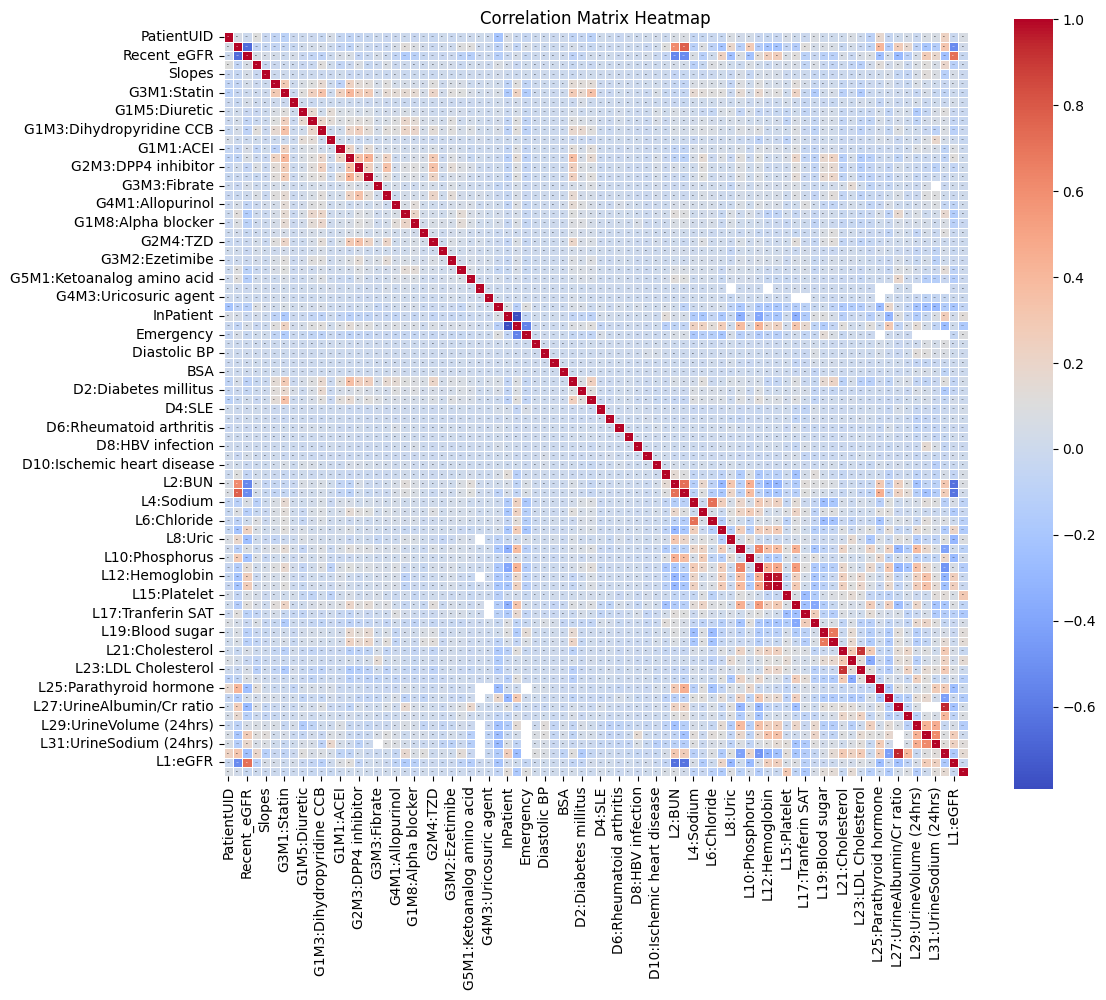

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a larger heatmap with customizations
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar=True,  # Add color bar
    square=True,  # Make the heatmap square
    annot_kws={"size": 1}  # Increase font size of annotations
)
plt.title("Correlation Matrix Heatmap")
plt.show()


## **MICE**

In [12]:
# Columns to impute using MICE
columns_to_mice = ['Recent_Creatinine', 'Recent_eGFR', 'InPatient', 'OutPatient',
                    'L2:BUN', 'L3:Creatinine', 'L4:Sodium', 'L6:Chloride', 'L12:Hemoglobin',
                    'L13:Hematocrit', 'L21:Cholesterol', 'L23:LDL Cholesterol',
                    'L27:UrineAlbumin/Cr ratio', 'L32:UrineProtein (24hrs)', 'L1:eGFR']
print(data[columns_to_mice].dtypes)

Recent_Creatinine            float64
Recent_eGFR                  float64
InPatient                      int64
OutPatient                     int64
L2:BUN                       float64
L3:Creatinine                float64
L4:Sodium                    float64
L6:Chloride                  float64
L12:Hemoglobin               float64
L13:Hematocrit               float64
L21:Cholesterol              float64
L23:LDL Cholesterol          float64
L27:UrineAlbumin/Cr ratio    float64
L32:UrineProtein (24hrs)     float64
L1:eGFR                      float64
dtype: object


In [13]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize the MICE imputer
imputer = IterativeImputer(random_state=0)

# Fit and transform the specified columns using MICE
data[columns_to_mice] = imputer.fit_transform(data[columns_to_mice]) ##I use only Columns using MICE to fit()

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


##**MissForest**

In [14]:
columns_to_miss = ['PatientUID', 'PatientVisitUID', 'G1M2:ARB', 'G3M1:Statin',
                    'G5M2:NSAIDs', 'G1M5:Diuretic', 'G1M7:Beta blocker', 'G1M3:Dihydropyridine CCB',
                    'G1M6:MRA', 'G1M1:ACEI', 'G2M2:Metformin', 'G2M3:DPP4 inhibitor', 'G2M1:SU', 'G3M3:Fibrate',
                    'G2M5:SGLT2i', 'G4M1:Allopurinol', 'G1M9:Vasodilator', 'G1M8:Alpha blocker', 'G2M6:Insulin',
                    'G2M4:TZD', 'G4M2:Febuxostat', 'G3M2:Ezetimibe', 'G1M4:Non-dihydropyridine CCB', 'G5M1:Ketoanalog amino acid',
                    'G2M7:GLP1-RA', 'G4M3:Uricosuric agent', 'Age', 'Emergency', 'Systolic BP', 'Diastolic BP', 'BMI', 'BSA',
                    'D1:Hypertension', 'D2:Diabetes millitus', 'D3:Dyslipidemia', 'D4:SLE', 'D5:Systemic sclerosis',
                    'D6:Rheumatoid arthritis', 'D7:HIV infection', 'D8:HBV infection', 'D9:HCV infection', 'D10:Ischemic heart disease',
                    'D11:Heart failure', 'L5:Potassium', 'L7:Bicarbonate', 'L8:Uric', 'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin',
                    'L15:Platelet', 'L16:TIBC', 'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c', 'L22:Triglyceride',
                    'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D', 'L28:UrineProtein/Cr ratio', 'L29:UrineVolume (24hrs)',
                    'L30:UrineUrea (24hrs)', 'L31:UrineSodium (24hrs)', 'L14:WBC']
columns_with_null = data.columns[data.isnull().any()].tolist()
columns_with_non_null = data.columns.difference(columns_with_null).tolist()

columns_to_miss_with_null = [col for col in columns_to_miss if col in columns_with_null]
columns_to_miss_without_null = [col for col in columns_to_miss if col in columns_with_non_null]

print("Columns with null values:")
print(data[columns_to_miss_with_null].dtypes)

print("\nColumns without null values:")
print(data[columns_to_miss_without_null].dtypes)


Columns with null values:
Systolic BP                  float64
Diastolic BP                 float64
BMI                          float64
BSA                          float64
L5:Potassium                 float64
L7:Bicarbonate               float64
L8:Uric                      float64
L9:Calcium                   float64
L10:Phosphorus               float64
L11:Albumin                  float64
L15:Platelet                 float64
L16:TIBC                     float64
L17:Tranferin SAT            float64
L18:Ferritin                 float64
L19:Blood sugar              float64
L20:HbA1c                    float64
L22:Triglyceride             float64
L24:HDL Cholesterol          float64
L25:Parathyroid hormone      float64
L26:Vitamin D                float64
L28:UrineProtein/Cr ratio    float64
L29:UrineVolume (24hrs)      float64
L30:UrineUrea (24hrs)        float64
L31:UrineSodium (24hrs)      float64
L14:WBC                      float64
dtype: object

Columns without null values:
Patie

In [15]:
# Store the original column names
original_columns = {}
for col in data.columns:
    original_columns[col.replace(" ", "").replace(":", "").replace("-", "").replace("/", "").replace("&", "").replace("#", "")] = col


In [16]:
# Rename only null_missforest columns
for col in data.columns:
    data = data.rename(columns={col: col.replace(" ", "").replace(":", "").replace("-", "").replace("/", "").replace("&", "").replace("#", "")})


In [17]:
print("Original column names:")
for new_name, old_name in original_columns.items():
    print(f"{new_name} -> {old_name}")

Original column names:
PatientUID -> PatientUID
Recent_Creatinine -> Recent_Creatinine
Recent_eGFR -> Recent_eGFR
Recent_Date -> Recent_Date
PatientVisitUID -> PatientVisitUID
Slopes -> Slopes
G1M2ARB -> G1M2:ARB
G3M1Statin -> G3M1:Statin
G5M2NSAIDs -> G5M2:NSAIDs
G1M5Diuretic -> G1M5:Diuretic
G1M7Betablocker -> G1M7:Beta blocker
G1M3DihydropyridineCCB -> G1M3:Dihydropyridine CCB
G1M6MRA -> G1M6:MRA
G1M1ACEI -> G1M1:ACEI
G2M2Metformin -> G2M2:Metformin
G2M3DPP4inhibitor -> G2M3:DPP4 inhibitor
G2M1SU -> G2M1:SU
G3M3Fibrate -> G3M3:Fibrate
G2M5SGLT2i -> G2M5:SGLT2i
G4M1Allopurinol -> G4M1:Allopurinol
G1M9Vasodilator -> G1M9:Vasodilator
G1M8Alphablocker -> G1M8:Alpha blocker
G2M6Insulin -> G2M6:Insulin
G2M4TZD -> G2M4:TZD
G4M2Febuxostat -> G4M2:Febuxostat
G3M2Ezetimibe -> G3M2:Ezetimibe
G1M4NondihydropyridineCCB -> G1M4:Non-dihydropyridine CCB
G5M1Ketoanalogaminoacid -> G5M1:Ketoanalog amino acid
G2M7GLP1RA -> G2M7:GLP1-RA
G4M3Uricosuricagent -> G4M3:Uricosuric agent
Sex -> Sex
Age -> Age



```
columns_to_miss_rename = ['PatientUID', 'PatientVisitUID', 'G1M2ARB', 'G3M1Statin',
                    'G5M2NSAIDs', 'G1M5Diuretic', 'G1M7Betablocker', 'G1M3DihydropyridineCCB',
                    'G1M6MRA', 'G1M1ACEI', 'G2M2Metformin', 'G2M3DPP4inhibitor', 'G2M1SU', 'G3M3Fibrate',
                    'G2M5SGLT2i', 'G4M1Allopurinol', 'G1M9Vasodilator', 'G1M8Alphablocker', 'G2M6Insulin',
                    'G2M4TZD', 'G4M2Febuxostat', 'G3M2Ezetimibe', 'G1M4NondihydropyridineCCB', 'G5M1Ketoanalogaminoacid',
                    'G2M7GLP1RA', 'G4M3Uricosuricagent', 'Age', 'Emergency', 'SystolicBP', 'DiastolicBP', 'BMI', 'BSA',
                    'D1Hypertension', 'D2Diabetesmillitus', 'D3Dyslipidemia', 'D4SLE', 'D5Systemicsclerosis',
                    'D6Rheumatoidarthritis', 'D7HIVinfection', 'D8HBVinfection', 'D9HCVinfection', 'D10Ischemicheartdisease',
                    'D11Heartfailure', 'L5Potassium', 'L7Bicarbonate', 'L8Uric', 'L9Calcium', 'L10Phosphorus', 'L11Albumin',
                    'L15Platelet', 'L16TIBC', 'L17TranferinSAT', 'L18Ferritin', 'L19Bloodsugar', 'L20HbA1c', 'L22Triglyceride',
                    'L24HDLCholesterol', 'L25Parathyroidhormone', 'L26VitaminD', 'L28UrineProteinCrratio', 'L29UrineVolume(24hrs)',
                    'L30UrineUrea(24hrs)', 'L31UrineSodium(24hrs)', 'L14WBC']
```



In [18]:
if data.empty:
    print("Data is empty.")
else:
    print("Data is not empty.")

Data is not empty.


In [22]:
data

,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2ARB,G3M1Statin,G5M2NSAIDs,G1M5Diuretic,...,L27UrineAlbuminCrratio,L28UrineProteinCrratio,L29UrineVolume(24hrs),L30UrineUrea(24hrs),L31UrineSodium(24hrs),L32UrineProtein(24hrs),L1eGFR,L14WBC,LabLocation,LabCwhen
0,924852,2.63,15.80,2560-08-07 12:32:50.527,4376081,18.847273,0,90,0,90,...,577.480841,NaN,NaN,NaN,NaN,672.902427,15.80,6.67,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-08-07 12:15:51.760
1,989278,2.03,32.30,2560-08-11 08:22:48.737,4390501,4.319167,0,0,0,0,...,159.154371,NaN,NaN,NaN,NaN,477.556008,32.30,9.65,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-08-11 10:22:04.653
2,2103792,1.05,55.90,2560-08-14 14:38:44.150,4394805,0.882418,0,0,0,0,...,-11552.172646,NaN,NaN,NaN,NaN,-10646.750421,55.90,7.48,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-08-14 15:03:54.277
3,953611,1.03,51.10,2560-08-15 02:05:01.323,4395019,6.312446,0,0,0,0,...,-15615.502814,NaN,NaN,NaN,NaN,-19914.909429,51.10,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-08-15 02:05:01.583
4,488150,1.94,32.60,2560-08-15 09:18:43.240,4396053,2.848364,0,0,0,0,...,234.616067,150.0,NaN,NaN,NaN,1046.545125,32.60,4.66,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-08-15 09:45:34.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,43763,1.30,55.28,2566-04-10 15:34:20.643,5674644,-9.146778,0,90,0,90,...,193.084734,NaN,NaN,NaN,NaN,1277.018276,68.10,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2561-10-25 09:43:02.440
52615,43763,1.30,55.28,2566-04-10 15:34:20.643,6817059,-4.929870,0,0,0,0,...,-119.892637,NaN,NaN,NaN,NaN,1691.699992,84.60,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2562-11-06 09:08:22.770
52616,43763,1.30,55.28,2566-04-10 15:34:20.643,8004571,16.017287,0,0,0,0,...,-22.832305,NaN,NaN,NaN,NaN,1093.937252,56.06,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2563-12-29 10:39:32.263
52617,43763,1.30,55.28,2566-04-10 15:34:20.643,9214741,-24.861814,0,100,0,100,...,49.307395,NaN,NaN,NaN,NaN,1063.424833,61.33,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2565-02-25 08:17:16.137


In [21]:
X

,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,G1M2ARB,G3M1Statin,G5M2NSAIDs,G1M5Diuretic,G1M7Betablocker,...,L27UrineAlbuminCrratio,L28UrineProteinCrratio,L29UrineVolume(24hrs),L30UrineUrea(24hrs),L31UrineSodium(24hrs),L32UrineProtein(24hrs),L1eGFR,L14WBC,LabLocation,LabCwhen
0,924852,2.63,15.80,0,4376081,0,90,0,90,0,...,577.480841,64.6,2372.0,6.35,110.0,672.902427,15.80,6.67,0,0
1,989278,2.03,32.30,1,4390501,0,0,0,0,32,...,159.154371,64.6,2372.0,6.35,110.0,477.556008,32.30,9.65,1,1
2,2103792,1.05,55.90,2,4394805,0,0,0,0,0,...,-11552.172646,64.6,2372.0,6.35,110.0,-10646.750421,55.90,7.48,0,2
3,953611,1.03,51.10,3,4395019,0,0,0,0,0,...,-15615.502814,64.6,2372.0,6.35,110.0,-19914.909429,51.10,6.73,1,3
4,488150,1.94,32.60,4,4396053,0,0,0,0,0,...,234.616067,150.0,2372.0,6.35,110.0,1046.545125,32.60,4.66,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,43763,1.30,55.28,18167,5674644,0,90,0,90,0,...,193.084734,64.6,2372.0,6.35,110.0,1277.018276,68.10,6.73,0,52614
52615,43763,1.30,55.28,18167,6817059,0,0,0,0,0,...,-119.892637,64.6,2372.0,6.35,110.0,1691.699992,84.60,6.73,0,52615
52616,43763,1.30,55.28,18167,8004571,0,0,0,0,0,...,-22.832305,64.6,2372.0,6.35,110.0,1093.937252,56.06,6.73,0,52616
52617,43763,1.30,55.28,18167,9214741,0,100,0,100,0,...,49.307395,64.6,2372.0,6.35,110.0,1063.424833,61.33,6.73,0,52617


In [19]:
!pip install missingpy
!pip install MissForest
import pandas as pd
from missforest.missforest import MissForest

# Make an instance and perform the imputation
imputer = MissForest()
X = data.drop('Slopes', axis=1)
X_imputed = imputer.fit_transform(X)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 1, number of used features: 0
[LightGBM] [Info] Start training from score 4.300000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

ValueError: ignored

In [ ]:
X_imputed

In [ ]:
#Evaluation
missF = np.sum(np.abs(X_imputed[data.isnull().any(axis=1)] - dt2[data.isnull().any(axis=1)]))


In [ ]:
# Rename the columns back to their original state
data = data.rename(columns=original_columns)

In [ ]:
data

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L14:WBC,Sex,Age,NATNL,Location,PricipalProblemCode,PricipalProblemName,InPatient,OutPatient,Emergency
0,2299,5812902,-7.158596,100,100,34,0,0,0,0,...,9.410000,หญิง,75.0,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0.0,1.0,0.0
1,2299,6947220,5.550691,35,0,1,35,0,0,0,...,6.202946,หญิง,76.0,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0.0,1.0,0.0
2,2299,8186767,-6.063710,100,0,15,0,0,0,0,...,5.420000,หญิง,78.0,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0.0,1.0,0.0
3,2299,9385133,-12.812245,90,0,0,0,0,0,0,...,7.265258,หญิง,79.0,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,F411,Generalized anxiety disorder,0.0,1.0,0.0
4,2304,4916314,28.287500,0,0,0,0,0,0,0,...,6.704847,หญิง,58.0,ไทย,หน่วยทะเบียนกลาง(Test พิเศษ)เวชศาสตร์ชันสูตร,None,None,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,3319961,10553903,10.568365,0,0,0,0,0,0,0,...,6.742022,ชาย,64.0,ไทย,หน่วยคลินิกพิเศษศูนย์บริการทางการแพทย์ชั้นเลิศ,44054006,Type 2 diabetes mellitus,0.0,1.0,0.0
52615,3319971,10553916,-4.256753,0,0,0,0,0,0,0,...,7.802948,หญิง,72.0,ไทย,หน่วยคลินิกพิเศษศูนย์บริการทางการแพทย์ชั้นเลิศ,44054006,Type 2 diabetes mellitus,0.0,1.0,0.0
52616,3320048,10572126,-0.692078,0,0,0,0,0,0,0,...,8.032939,ชาย,67.0,ไทย,TB (คลินิก)-D707,A150,"Tuberculosis of lung\, confirmed by sputum mic...",0.0,1.0,0.0
52617,3320050,10572565,7.217875,0,0,0,0,0,0,0,...,18.700000,ชาย,68.0,ไทย,โรคเลือดและต่อมน้ำเหลือง (คลินิก)-D716,414166008,"Extranodal NK/T-cell lymphoma, nasal type",0.0,1.0,0.0


In [ ]:
data.to_excel('MICE+MissForest.xlsx')